# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import math
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.11 


In [2]:
import os 
directory = os.path.dirname(os.path.realpath('FindingCrate.ipynb'))

# Equalização de histograma

In [3]:
rintin = cv2.imread("RinTinTin.jpg")

In [4]:
rintin.shape

(240, 320, 3)

In [5]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [6]:
rintin_gray.shape

(240, 320)

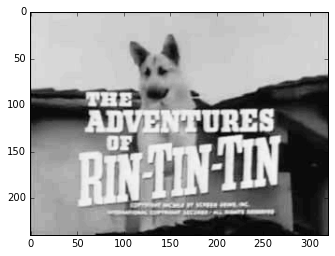

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r")

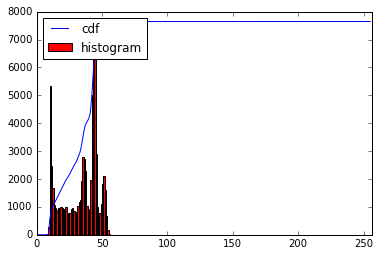

In [8]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

In [9]:
lista = rintin_gray
for k in range(len(lista)):
    lista[k]*=5

In [10]:
rintin_after = []
for i in lista:
    rintin_after.append(np.asarray(i))
rintin_final = np.asarray(rintin_after)
cv2.imwrite('fixed.png', rintin_final)

True

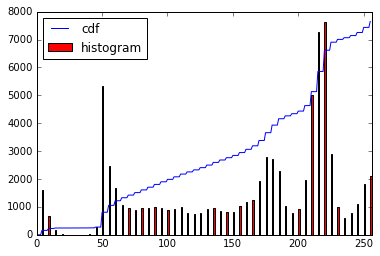

In [11]:
hist,bins = np.histogram(lista.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(lista.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [12]:
box = cv2.imread("hall_box_battery1.jpg")

In [13]:
box_LAB = cv2.cvtColor(box, cv2.COLOR_BGR2HSV)

In [14]:
upper_box_red = np.array([30,300,310])
lower_box_red = np.array([0,150,65])

In [15]:
mask = cv2.inRange(box_LAB, lower_box_red, upper_box_red)
output = cv2.bitwise_and(box_LAB, box_LAB, mask = mask)

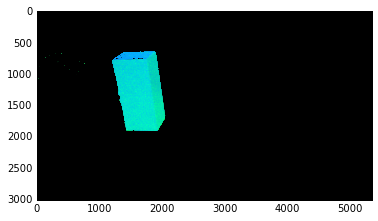

In [16]:
plt.imshow(output)

In [17]:
upper_box_blue = np.array([180,280,200])
lower_box_blue = np.array([80,150,50])

In [18]:
mask2 = cv2.inRange(box_LAB, lower_box_blue, upper_box_blue)
output2 = cv2.bitwise_and(box_LAB, box_LAB, mask = mask2)

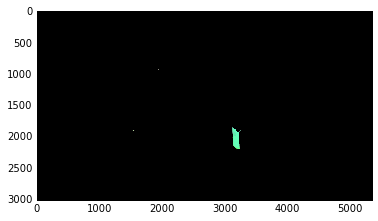

In [19]:
plt.imshow(output2)